# problems overview

In [47]:
# matchup ratio

# 1.EDA

### general overview

In [105]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler

In [106]:
data = os.listdir('data')
print(data)

['.DS_Store', 'Online_Dating_Behavior_Dataset.csv']


In [107]:
df = pd.read_csv('data/Online_Dating_Behavior_Dataset.csv')

df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          1000 non-null   int64
 1   PurchasedVIP    1000 non-null   int64
 2   Income          1000 non-null   int64
 3   Children        1000 non-null   int64
 4   Age             1000 non-null   int64
 5   Attractiveness  1000 non-null   int64
 6   Matches         1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [109]:
df.isnull().sum()

Gender            0
PurchasedVIP      0
Income            0
Children          0
Age               0
Attractiveness    0
Matches           0
dtype: int64

In [110]:
df.describe()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.51000,0.474000,50988.447000,0.978000,34.616000,5.624000,76.05000
std,0.50015,0.499573,9889.336141,0.997251,9.147799,2.824288,52.71315
min,0.00000,0.000000,20786.000000,0.000000,18.000000,1.000000,0.00000
25%,0.00000,0.000000,44358.500000,0.000000,27.000000,3.000000,0.00000
50%,1.00000,0.000000,50841.500000,1.000000,35.000000,6.000000,70.00000
75%,1.00000,1.000000,57396.000000,2.000000,43.000000,8.000000,120.00000
max,1.00000,1.000000,81931.000000,3.000000,49.000000,10.000000,160.00000


In [111]:
df.nunique()

Gender              2
PurchasedVIP        2
Income            989
Children            4
Age                32
Attractiveness     10
Matches            11
dtype: int64

### data insight

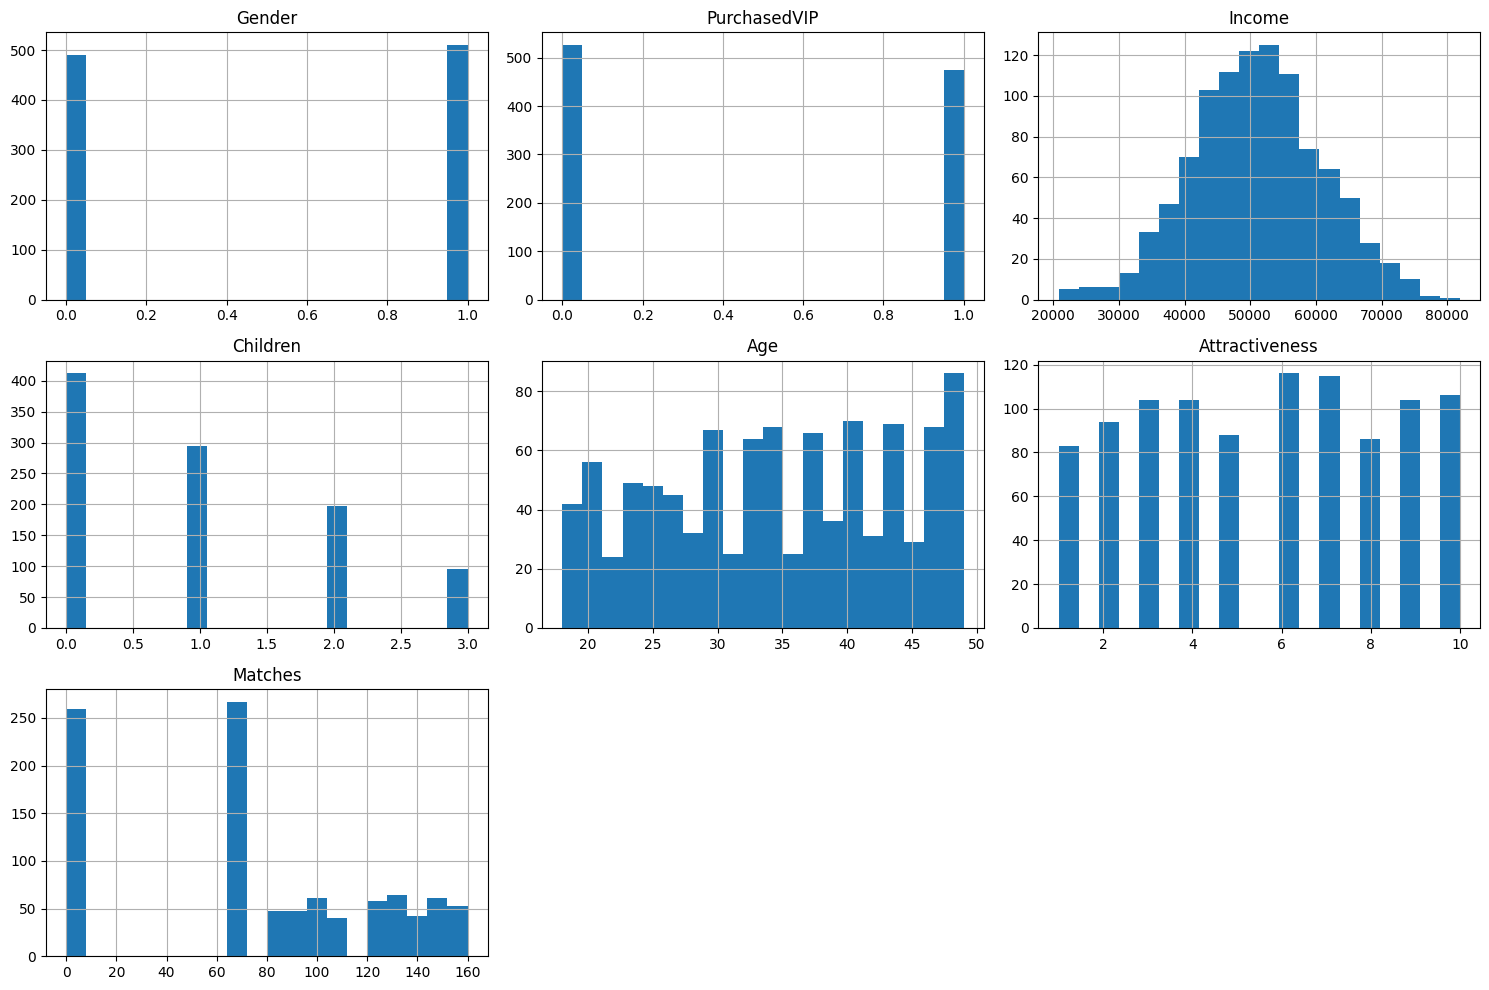

In [112]:
# check distribution
df.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

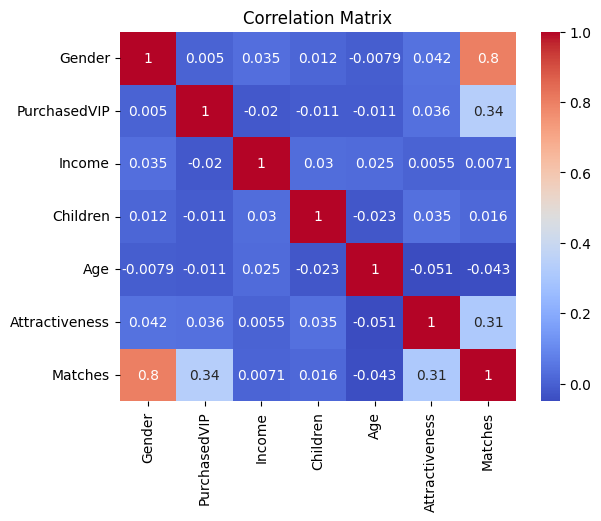

In [113]:
#only gender and matches has high correlation,means no overlap feature
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [114]:
min_matches = df['Matches'].min()
max_matches = df['Matches'].max()

df['Matches_Percentage'] = ((df['Matches'] - min_matches) / (max_matches - min_matches)) * 99 + 1

print(df[['Matches', 'Matches_Percentage']].head())

   Matches  Matches_Percentage
0       70             44.3125
1      130             81.4375
2        0              1.0000
3        0              1.0000
4        0              1.0000


In [115]:
df = df.drop('Matches', axis=1)

print(df.head())

   Gender  PurchasedVIP  Income  Children  Age  Attractiveness  \
0       0             1   51777         3   47               5   
1       1             0   36646         0   42               7   
2       0             0   53801         1   25               5   
3       0             0   56105         0   35               8   
4       0             0   55597         1   36               6   

   Matches_Percentage  
0             44.3125  
1             81.4375  
2              1.0000  
3              1.0000  
4              1.0000  


In [116]:
df.isnull().sum()

Gender                0
PurchasedVIP          0
Income                0
Children              0
Age                   0
Attractiveness        0
Matches_Percentage    0
dtype: int64

In [117]:
from sklearn.preprocessing import MinMaxScaler
df_backup= df
scaler = MinMaxScaler()
df[['Income', 'Age', 'Attractiveness']] = scaler.fit_transform(df[['Income', 'Age', 'Attractiveness']])
df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches_Percentage
0,0,1,0.506844,3,0.935484,0.444444,44.3125
1,1,0,0.259383,0,0.774194,0.666667,81.4375
2,0,0,0.539946,1,0.225806,0.444444,1.0000
3,0,0,0.577627,0,0.548387,0.777778,1.0000
4,0,0,0.569319,1,0.580645,0.555556,1.0000


### model training

In [118]:
from sklearn.model_selection import train_test_split

y = df['Matches_Percentage'] 
X = df.drop('Matches_Percentage', axis=1)  

In [119]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training Set: {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Test Set: {X_test.shape[0]} samples")

Training Set: 600 samples
Validation Set: 200 samples
Test Set: 200 samples


In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(random_state=44),
    "Gradient Boosting Regression": GradientBoostingRegressor(random_state=44),
    "Support Vector Regression (SVR)": SVR(),
    "K-Nearest Neighbors Regression": KNeighborsRegressor()
}

In [122]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)  
    r2 = r2_score(y_val, y_pred)  

    results[model_name] = {"MSE": mse, "R2": r2}

    print(f"{model_name}:")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  R-squared: {r2:.4f}")
    print("-" * 50)

print("\nComparison of all models:")
for model_name, metrics in results.items():
    print(f"{model_name} -> MSE: {metrics['MSE']:.4f}, R2: {metrics['R2']:.4f}")

Linear Regression:
  Mean Squared Error: 180.2676
  R-squared: 0.8214
--------------------------------------------------
Random Forest Regression:
  Mean Squared Error: 0.0000
  R-squared: 1.0000
--------------------------------------------------
Gradient Boosting Regression:
  Mean Squared Error: 0.0000
  R-squared: 1.0000
--------------------------------------------------
Support Vector Regression (SVR):
  Mean Squared Error: 174.5869
  R-squared: 0.8270
--------------------------------------------------
K-Nearest Neighbors Regression:
  Mean Squared Error: 15.9649
  R-squared: 0.9842
--------------------------------------------------

Comparison of all models:
Linear Regression -> MSE: 180.2676, R2: 0.8214
Random Forest Regression -> MSE: 0.0000, R2: 1.0000
Gradient Boosting Regression -> MSE: 0.0000, R2: 1.0000
Support Vector Regression (SVR) -> MSE: 174.5869, R2: 0.8270
K-Nearest Neighbors Regression -> MSE: 15.9649, R2: 0.9842


### model tuning

In [130]:
#tuning linear regression(still overfitting)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_poly, y_train)
y_train_pred = ridge_model.predict(X_poly)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

r2_train = r2_score(y_train, y_train_pred)

print(f"Training MSE: {mse_train}")
print(f"Training RMSE: {rmse_train}")
print(f"Training R²: {r2_train}")

Training MSE: 0.481942806466292
Training RMSE: 0.6942210069324408
Training R²: 0.9995490258059595


In [133]:
#rf tuning
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=44)

In [134]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

array([-0., -0., -0., -0., -0.])

In [136]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=44)

In [137]:
cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

array([-0.04793817, -0.05155531, -0.05099809, -0.0367477 , -0.04619382])

In [143]:
## tuning knn
# Hyperparameters to tune
n_neighbors_range = [3, 5, 7, 9]  
weights_options = ['uniform', 'distance'] 
metrics_options = ['minkowski', 'euclidean', 'manhattan']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []
for n_neighbors in n_neighbors_range:
    for weights in weights_options:
        for metric in metrics_options:
 
            knn_model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, metric=metric)
            knn_model.fit(X_train, y_train)

            y_pred = knn_model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            results.append({
                'n_neighbors': n_neighbors,
                'weights': weights,
                'metric': metric,
                'MSE': mse,
                'R²': r2
            })

# Find the best result (lowest MSE or highest R²)
best_result = min(results, key=lambda x: x['MSE']) 

print(f"n_neighbors: {best_result['n_neighbors']}, weights: {best_result['weights']}, metric: {best_result['metric']}")
print(f"  MSE: {best_result['MSE']:.4f}, R²: {best_result['R²']:.4f}")

n_neighbors: 3, weights: distance, metric: manhattan
  MSE: 7.0688, R²: 0.9932


In [144]:
import joblib

best_result = min(results, key=lambda x: x['MSE']) 

best_n_neighbors = best_result['n_neighbors']
best_weights = best_result['weights']
best_metric = best_result['metric']

best_knn_model = KNeighborsRegressor(
    n_neighbors=best_n_neighbors,
    weights=best_weights,
    metric=best_metric
)
best_knn_model.fit(X_train, y_train)

y_test_pred = best_knn_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Final Model Evaluation on Test Set:")
print(f"  MSE: {mse_test:.4f}, R²: {r2_test:.4f}")

joblib.dump(best_knn_model, 'best_knn_model.pkl')

Final Model Evaluation on Test Set:
  MSE: 7.0688, R²: 0.9932


['best_knn_model.pkl']